In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from statsmodels.graphics.tsaplots import plot_pacf

from darkgreybox.model import TiTeTh
from darkgreybox.fit import train_models

In [4]:
# the duration of a record
rec_duration = 1 # hour

In [5]:
train_df = pd.read_csv('./data/demo_data.csv', index_col=0, parse_dates=True)

input_X = train_df[['Ph', 'Ta', 'Th']]
input_y = train_df['Ti']

input_X['Ti0'] = input_y
input_X['Th0'] = input_y
input_X['Te0'] = input_y - 2 

print(f'Input X shape: {input_X.shape}, input y shape: {input_y.shape}')

Input X shape: (792, 6), input y shape: (792,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(input_X, input_y, test_size=5 / 33, shuffle=False)

print(f'Train: X shape: {X_train.shape}, y shape: {y_train.shape}')
print(f'Test: X shape: {X_test.shape}, y shape: {y_test.shape}')

Train: X shape: (672, 6), y shape: (672,)
Test: X shape: (120, 6), y shape: (120,)


In [7]:
train_params = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Te0': {'value': X_train.iloc[0]['Te0'], 'vary': True, 'min': 10, 'max': 25},
    'Th0': {'value': X_train.iloc[0]['Th0'], 'vary': False},    
    'Ci': {'value': 1},
    'Ch': {'value': 2.55, 'vary': False},
    'Ce': {'value': 1},
    'Rie': {'value': 1},
    'Rea': {'value': 1},
    'Rih': {'value': 0.65, 'vary': False}
}

In [8]:
prefit_df = train_models(models=[TiTeTh(train_params, rec_duration=1)],
                         X_train=X_train, 
                         y_train=y_train, 
                         splits=KFold(n_splits=int(len(X_train) / 24), shuffle=False).split(X_train), 
                         error_metric=mean_squared_error,
                         method='nelder', 
                         n_jobs=-1, 
                         verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:   25.7s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   30.7s finished


In [9]:
prefit_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2019-12-23 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819b8...,<darkgreybox.model.DarkGreyModelResult object ...,4.297758,nelder,1.864261e-02
1,2019-12-24 00:00:00+00:00,2019-12-24 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819c5...,<darkgreybox.model.DarkGreyModelResult object ...,6.330049,nelder,7.529731e+00
2,2019-12-25 00:00:00+00:00,2019-12-25 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819b7...,<darkgreybox.model.DarkGreyModelResult object ...,1.249610,nelder,2.895712e-02
3,2019-12-26 00:00:00+00:00,2019-12-26 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819b7...,<darkgreybox.model.DarkGreyModelResult object ...,0.755108,nelder,5.067348e-04
4,2019-12-27 00:00:00+00:00,2019-12-27 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819b8...,<darkgreybox.model.DarkGreyModelResult object ...,3.379582,nelder,1.669811e-03
5,2019-12-28 00:00:00+00:00,2019-12-28 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819b8...,<darkgreybox.model.DarkGreyModelResult object ...,0.686456,nelder,2.069680e-04
6,2019-12-29 00:00:00+00:00,2019-12-29 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819c7...,<darkgreybox.model.DarkGreyModelResult object ...,6.209948,nelder,1.029399e-02
7,2019-12-30 00:00:00+00:00,2019-12-30 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819c5...,<darkgreybox.model.DarkGreyModelResult object ...,1.404432,nelder,2.601565e-02
8,2019-12-31 00:00:00+00:00,2019-12-31 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819c8...,<darkgreybox.model.DarkGreyModelResult object ...,6.476538,nelder,2.263893e+06
9,2020-01-01 00:00:00+00:00,2020-01-01 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819c6...,<darkgreybox.model.DarkGreyModelResult object ...,0.721627,nelder,7.899213e-01


In [10]:
train_df = train_models(models=prefit_df['model'],
                        X_train=X_train, 
                        y_train=y_train, 
                        splits=None, 
                        error_metric=mean_squared_error,
                        method='nelder', 
                        n_jobs=-1, 
                        verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:  2.5min remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  3.5min finished


In [11]:
train_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.658260,nelder,NaN
1,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819d1...,<darkgreybox.model.DarkGreyModelResult object ...,26.484828,nelder,0.517008
2,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.712701,nelder,NaN
3,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.520226,nelder,NaN
4,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.597470,nelder,NaN
5,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.634718,nelder,NaN
6,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.955045,nelder,NaN
7,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeTh object at 0x7f9819d2...,<darkgreybox.model.DarkGreyModelResult object ...,15.685734,nelder,0.202914
8,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,2.064483,nelder,NaN
9,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.091103,nelder,NaN


In [15]:
model = train_df.loc[7, 'model']
train_results = train_df.loc[7, 'model_result']

model.result.params

name,value,standard error,relative error,initial value,min,max,vary
Ti0,18.1375000,0.00000000,(0.00%),18.1375,-inf,inf,False
Te0,17.3484752,0.09073095,(0.52%),16.1375,10.0000000,25.0000000,True
Th0,18.1375000,0.00000000,(0.00%),18.1375,-inf,inf,False
Ci,139.474972,4.96992992,(3.56%),168.03536897753918,-inf,inf,True
Ch,2.55000000,0.00000000,(0.00%),2.55,-inf,inf,False
Ce,476.512922,11.8640032,(2.49%),94.5878890501958,-inf,inf,True
Rie,0.08369983,0.00339658,(4.06%),0.6336455823576862,-inf,inf,True
Rea,0.54897348,0.00404786,(0.74%),0.13436046076933889,-inf,inf,True
Rih,0.65000000,0.00000000,(0.00%),0.65,-inf,inf,False


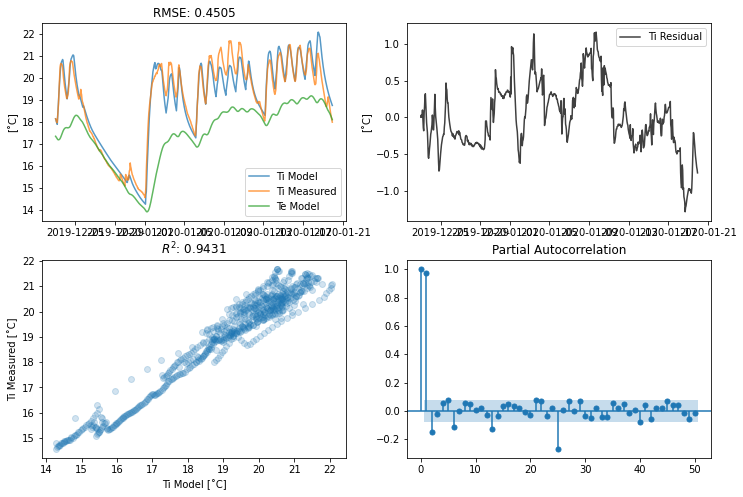

In [16]:
rmse = mean_squared_error(y_train, train_results.Z) ** 0.5
r2 = r2_score(y_train, train_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_train.index, train_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_train, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_train.index, train_results.Te, label='Te Model', alpha=0.75)
ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(train_results.Z, y_train, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_train.index, y_train - train_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_train - train_results.Z, ax=ax[1, 1], lags=50);


In [17]:
test_results = model.predict(X=X_test, ic_params={'Ti0': y_test.iloc[0], 'Te0': train_results.Te[-1]})

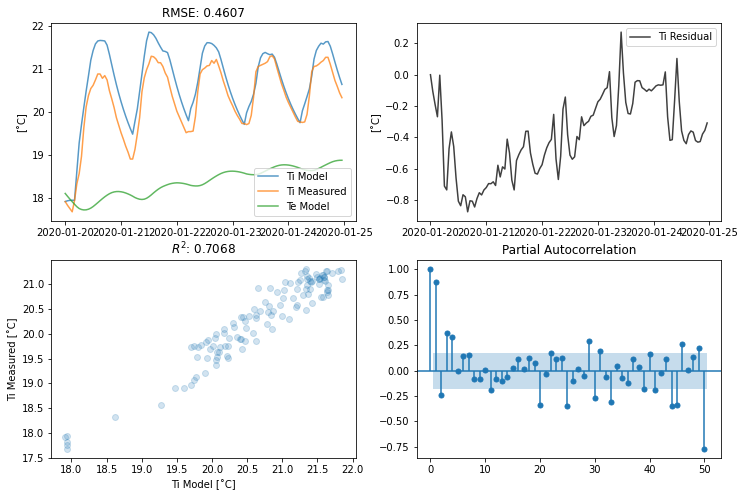

In [18]:
rmse = mean_squared_error(y_test, test_results.Z) ** 0.5
r2 = r2_score(y_test, test_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_test.index, test_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_test, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_test.index, test_results.Te, label='Te Model', alpha=0.75)

ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(test_results.Z, y_test, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_test.index, y_test - test_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_test - test_results.Z, ax=ax[1, 1], lags=50);
